#### Даня, 3 октября

# Обучение модели и предсказания

In [1]:
import pandas as pd
import zipfile
from datetime import date
import datetime
import calendar
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import matplotlib.dates as mdates
import random
from tqdm import tqdm
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import train_test_split 

<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [2]:
# тренировочные данные

df_friday_train = pd.read_csv("./proceeded/train/friday_train.csv", sep = ";")
df_monday_train = pd.read_csv("./proceeded/train/monday_train.csv", sep = ";")
df_saturday_train = pd.read_csv("./proceeded/train/saturday_train.csv", sep = ";")
df_sunday_train = pd.read_csv("./proceeded/train/sunday_train.csv", sep = ";")
df_thursday_train = pd.read_csv("./proceeded/train/thursday_train.csv", sep = ";")
df_tuesday_train = pd.read_csv("./proceeded/train/tuesday_train.csv", sep = ";")
df_wednesday_train = pd.read_csv("./proceeded/train/wednesday_train.csv", sep = ";")


df_friday_train = df_friday_train.dropna()
df_monday_train = df_monday_train.dropna()
df_saturday_train = df_saturday_train.dropna()
df_sunday_train = df_sunday_train.dropna()
df_thursday_train = df_thursday_train.dropna()
df_tuesday_train = df_tuesday_train.dropna()
df_wednesday_train = df_wednesday_train.dropna()


# данные для предсказаний
test_df = pd.read_csv("./proceeded/test.csv", sep = ";")

# медианы по регионам
medians = pd.read_csv('./proceeded/medians.csv', sep = ";")

In [3]:
# Преобразование тренировочных и тестовых данных

X_mon = df_monday_train.drop(['delivery_area_id', 'last_date','weekday', 'y'], axis = 1)
y_mon = df_monday_train[["y"]]

X_tue = df_tuesday_train.drop(['delivery_area_id', 'last_date','weekday', 'y'], axis = 1)
y_tue = df_tuesday_train[["y"]]

X_wed = df_wednesday_train.drop(['delivery_area_id', 'last_date','weekday', 'y'], axis = 1)
y_wed = df_wednesday_train[["y"]]

X_thu = df_thursday_train.drop(['delivery_area_id', 'last_date','weekday', 'y'], axis = 1)
y_thu = df_thursday_train[["y"]]

X_fri = df_friday_train.drop(['delivery_area_id', 'last_date','weekday', 'y'], axis = 1)
y_fri = df_friday_train[["y"]]

X_sat = df_saturday_train.drop(['delivery_area_id', 'last_date','weekday', 'y'], axis = 1)
y_sat = df_saturday_train[["y"]]

X_sun = df_sunday_train.drop(['delivery_area_id', 'last_date','weekday', 'y'], axis = 1)
y_sun = df_sunday_train[["y"]]

X_for_predictions = test_df.drop(['delivery_area_id', 'last_date'], axis = 1)
X_for_predictions = X_for_predictions.replace(np.inf, 1)

In [4]:
# индексы area_id (для склеивания с предсказаниями)
indexes_id = test_df["delivery_area_id"]

# _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ 
### По одной модели проверим точность прогнозов  

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X_mon, y_mon, test_size=.20)

In [6]:
def MAPE(Y_actual,Y_Predicted):
    mape = np.mean(np.abs((Y_actual - Y_Predicted)/Y_actual))*100
    return mape

In [7]:
lr = LinearRegression().fit(X_train , y_train)
LR_Test_predict = lr.predict(X_test)
LR_MAPE= MAPE(y_test,LR_Test_predict)
print("MAPE: ",LR_MAPE)

MAPE:  y    18.775427
dtype: float64


D:\SetUps\Anaconda\lib\site-packages\numpy\core\fromnumeric.py:3438: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


# _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ 

In [8]:
### обучение моделей

lr_mon = LinearRegression().fit(X_mon , y_mon)
lr_tue = LinearRegression().fit(X_tue , y_tue)
lr_wed = LinearRegression().fit(X_wed , y_wed)
lr_thu = LinearRegression().fit(X_thu , y_thu)
lr_fri = LinearRegression().fit(X_fri , y_fri)
lr_sat = LinearRegression().fit(X_sat , y_sat)
lr_sun = LinearRegression().fit(X_sun , y_sun)

In [9]:
# получение предсказаний

pred_mon = lr_mon.predict(X_for_predictions)
pred_tue = lr_tue.predict(X_for_predictions)
pred_wed = lr_wed.predict(X_for_predictions)
pred_thu = lr_thu.predict(X_for_predictions)
pred_fri = lr_fri.predict(X_for_predictions)
pred_sat = lr_sat.predict(X_for_predictions)
pred_sun = lr_sun.predict(X_for_predictions)

In [10]:
df_pred_mon = pd.DataFrame({'delivery_area_id': list(indexes_id),
              'prediction_norm' : np.concatenate(pred_mon).tolist()
             })

df_pred_tue = pd.DataFrame({'delivery_area_id': list(indexes_id),
              'prediction_norm' : np.concatenate(pred_tue).tolist()
             })

df_pred_wed = pd.DataFrame({'delivery_area_id': list(indexes_id),
              'prediction_norm' : np.concatenate(pred_wed).tolist()
             })

df_pred_thu = pd.DataFrame({'delivery_area_id': list(indexes_id),
              'prediction_norm' : np.concatenate(pred_thu).tolist()
             })

df_pred_fri = pd.DataFrame({'delivery_area_id': list(indexes_id),
              'prediction_norm' : np.concatenate(pred_fri).tolist()
             })

df_pred_sat = pd.DataFrame({'delivery_area_id': list(indexes_id),
              'prediction_norm' : np.concatenate(pred_sat).tolist()
             })

df_pred_sun = pd.DataFrame({'delivery_area_id': list(indexes_id),
              'prediction_norm' : np.concatenate(pred_sun).tolist()
             })

In [11]:
medians = medians.fillna(medians.mean())

df_pred_mon = df_pred_mon.merge(medians, how = "inner", on = ["delivery_area_id"])
df_pred_tue = df_pred_tue.merge(medians, how = "inner", on = ["delivery_area_id"])
df_pred_wed = df_pred_wed.merge(medians, how = "inner", on = ["delivery_area_id"])
df_pred_thu = df_pred_thu.merge(medians, how = "inner", on = ["delivery_area_id"])
df_pred_fri = df_pred_fri.merge(medians, how = "inner", on = ["delivery_area_id"])
df_pred_sat = df_pred_sat.merge(medians, how = "inner", on = ["delivery_area_id"])
df_pred_sun = df_pred_sun.merge(medians, how = "inner", on = ["delivery_area_id"])

In [12]:
for df_help in [df_pred_mon, df_pred_tue, df_pred_wed,
                df_pred_thu, df_pred_fri, df_pred_sat, df_pred_sun]:
    df_help["prediction"] =  df_help["prediction_norm"] * df_help["median"]

In [13]:
df_pred_mon = df_pred_mon[["delivery_area_id", "prediction"]]
df_pred_tue = df_pred_tue[["delivery_area_id", "prediction"]]
df_pred_wed = df_pred_wed[["delivery_area_id", "prediction"]]
df_pred_thu = df_pred_thu[["delivery_area_id", "prediction"]]
df_pred_fri = df_pred_fri[["delivery_area_id", "prediction"]]
df_pred_sat = df_pred_sat[["delivery_area_id", "prediction"]]
df_pred_sun = df_pred_sun[["delivery_area_id", "prediction"]]

In [14]:
df_pred_mon.to_csv("./proceeded/predictions/monday.csv", sep = ";", index = False)
df_pred_tue.to_csv("./proceeded/predictions/tuesday.csv", sep = ";", index = False)
df_pred_wed.to_csv("./proceeded/predictions/wednesday.csv", sep = ";", index = False)
df_pred_thu.to_csv("./proceeded/predictions/thursday.csv", sep = ";", index = False)
df_pred_fri.to_csv("./proceeded/predictions/friday.csv", sep = ";", index = False)
df_pred_sat.to_csv("./proceeded/predictions/saturday.csv", sep = ";", index = False)
df_pred_sun.to_csv("./proceeded/predictions/sunday.csv", sep = ";", index = False)

## Настя и Катя

In [15]:
# Открываем данные и смотрим на таблички
df1 = pd.read_csv('./orders.csv')
df2 = pd.read_csv('./partners_delays.csv')

df2.rename(columns = {'dttm' : 'date'}, inplace = True)


#Сливаем таблички по дате и региону доставки
df3 = df2.merge(df1, on=["date", "delivery_area_id"], how = 'outer')
df3['date'] = pd.to_datetime(df3['date'])


#Заполняем NA нулями и делаем даты индексами
df3.orders_cnt.fillna(0, inplace=True)
df3.index = df3.date
df3 = df3.drop(columns =['date'])
df3['day_of_week'] = df3.index.dayofweek
df3['hour'] = df3.index.hour
df3.index = df3.index.values.astype('M8[D]')
df3.index.name = 'date'
uni = df3.index.unique()[-21:]
df3 = df3.loc[uni]
df3 = df3.drop_duplicates()
df3

,delivery_area_id,partners_cnt,delay_rate,orders_cnt,day_of_week,hour
date,,,,,,
2021-11-10,0,2.0,0.000000,0.0,2,9
2021-11-10,0,5.0,0.000000,12.0,2,10
2021-11-10,0,5.0,0.000000,9.0,2,11
2021-11-10,0,5.0,0.250000,12.0,2,12
2021-11-10,0,3.0,0.166667,6.0,2,13
...,...,...,...,...,...,...
2021-11-30,592,2.0,0.000000,1.0,1,15
2021-11-30,592,3.0,0.000000,6.0,1,16
2021-11-30,592,2.0,0.000000,3.0,1,17


In [16]:
# Расперделяем по дням и часам количество заказов пронозируемых
area = df3.delivery_area_id.drop_duplicates().tolist()


#пятница
fri = df3[df3.day_of_week == 4]
for i in area:
    mu = df_pred_fri[df_pred_fri.delivery_area_id == i].prediction.values
    ghgh = fri[fri.delivery_area_id == i]
    qu = round((ghgh.orders_cnt/ghgh.orders_cnt.sum())*mu)
    fri.loc[(fri.delivery_area_id == i), 'orders_cnt'] = qu  
display(fri)



#суббота
sat = df3[df3.day_of_week == 5]
for j in area:
    mu_1 = df_pred_sat[df_pred_sat.delivery_area_id == j].prediction.values
    ghgh_1 = sat[sat.delivery_area_id == j]
    qu_1 = round((ghgh_1.orders_cnt/ghgh_1.orders_cnt.sum())*mu_1)
    sat.loc[(sat.delivery_area_id == j), 'orders_cnt'] = qu_1  
display(sat)

#воскресенье
sun = df3[df3.day_of_week == 6]
for en in area:
    mu_2 = df_pred_sun[df_pred_sun.delivery_area_id == en].prediction.values
    ghgh_2 = sun[sun.delivery_area_id == en]
    qu_2 = round((ghgh_2.orders_cnt/ghgh_2.orders_cnt.sum())*mu_2)
    sun.loc[(sun.delivery_area_id == en), 'orders_cnt'] = qu_2  
display(sun)


#понедельник
mon = df3[df3.day_of_week == 0]
for jj in area:
    mu_3 = df_pred_mon[df_pred_mon.delivery_area_id == jj].prediction.values
    ghgh_3 = mon[mon.delivery_area_id == jj]
    qu_3 = round((ghgh_3.orders_cnt/ghgh_3.orders_cnt.sum())*mu_3)
    mon.loc[(mon.delivery_area_id == jj), 'orders_cnt'] = qu_3
display(mon)


#вторник
tue = df3[df3.day_of_week == 1]
for ii in area:
    mu_4 = df_pred_tue[df_pred_tue.delivery_area_id == ii].prediction.values
    ghgh_4 = tue[tue.delivery_area_id == ii]
    qu_4 = round((ghgh_4.orders_cnt/ghgh_4.orders_cnt.sum())*mu_4)
    tue.loc[(tue.delivery_area_id == ii), 'orders_cnt'] = qu_4  
display(tue)


#среда
wed = df3[df3.day_of_week == 2]
for jo in area:
    mu_5 = df_pred_wed[df_pred_wed.delivery_area_id == jo].prediction.values
    ghgh_5 = wed[wed.delivery_area_id == jo]
    qu_5 = round((ghgh_5.orders_cnt/ghgh_5.orders_cnt.sum())*mu_5)
    wed.loc[(wed.delivery_area_id == jo), 'orders_cnt'] = qu_5
display(wed)



#четверг
thu = df3[df3.day_of_week == 3]
for ju in area:
    mu_6 = df_pred_thu[df_pred_thu.delivery_area_id == ju].prediction.values
    ghgh_6 = thu[thu.delivery_area_id == ju]
    qu_6 = round((ghgh_6.orders_cnt/ghgh_6.orders_cnt.sum())*mu_6)
    thu.loc[(thu.delivery_area_id == ju), 'orders_cnt'] = qu_6 
thu


,delivery_area_id,partners_cnt,delay_rate,orders_cnt,day_of_week,hour
date,,,,,,
2021-11-12,0,1.0,0.000000,0.0,4,9
2021-11-12,0,6.0,0.125000,6.0,4,10
2021-11-12,0,6.0,0.000000,2.0,4,11
2021-11-12,0,6.0,0.111111,4.0,4,12
2021-11-12,0,6.0,0.062500,6.0,4,13
...,...,...,...,...,...,...
2021-11-26,592,2.0,0.000000,2.0,4,15
2021-11-26,592,2.0,0.250000,2.0,4,17
2021-11-26,592,2.0,0.000000,2.0,4,18


,delivery_area_id,partners_cnt,delay_rate,orders_cnt,day_of_week,hour
date,,,,,,
2021-11-13,0,1.0,0.000000,0.0,5,9
2021-11-13,0,4.0,0.181818,5.0,5,10
2021-11-13,0,6.0,0.133333,6.0,5,11
2021-11-13,0,6.0,0.000000,4.0,5,12
2021-11-13,0,6.0,0.000000,5.0,5,13
...,...,...,...,...,...,...
2021-11-27,592,2.0,0.000000,1.0,5,16
2021-11-27,592,2.0,0.250000,2.0,5,17
2021-11-27,592,2.0,0.000000,0.0,5,18


,delivery_area_id,partners_cnt,delay_rate,orders_cnt,day_of_week,hour
date,,,,,,
2021-11-14,0,2.0,0.000000,0.0,6,9
2021-11-14,0,6.0,0.000000,7.0,6,10
2021-11-14,0,6.0,0.000000,3.0,6,11
2021-11-14,0,6.0,0.000000,5.0,6,12
2021-11-14,0,4.0,0.083333,5.0,6,13
...,...,...,...,...,...,...
2021-11-28,592,2.0,0.000000,2.0,6,16
2021-11-28,592,3.0,0.000000,3.0,6,18
2021-11-28,592,2.0,0.250000,2.0,6,19


,delivery_area_id,partners_cnt,delay_rate,orders_cnt,day_of_week,hour
date,,,,,,
2021-11-15,0,2.0,0.000000,0.0,0,9
2021-11-15,0,5.0,0.384615,5.0,0,10
2021-11-15,0,5.0,0.166667,5.0,0,11
2021-11-15,0,5.0,0.000000,3.0,0,12
2021-11-15,0,3.0,0.333333,2.0,0,13
...,...,...,...,...,...,...
2021-11-29,592,1.0,0.500000,1.0,0,16
2021-11-29,592,3.0,0.000000,2.0,0,17
2021-11-29,592,4.0,0.200000,2.0,0,18


,delivery_area_id,partners_cnt,delay_rate,orders_cnt,day_of_week,hour
date,,,,,,
2021-11-16,0,1.0,0.000000,0.0,1,9
2021-11-16,0,7.0,0.105263,7.0,1,10
2021-11-16,0,7.0,0.200000,5.0,1,11
2021-11-16,0,7.0,0.083333,4.0,1,12
2021-11-16,0,6.0,0.000000,3.0,1,13
...,...,...,...,...,...,...
2021-11-30,592,2.0,0.000000,0.0,1,15
2021-11-30,592,3.0,0.000000,2.0,1,16
2021-11-30,592,2.0,0.000000,1.0,1,17


,delivery_area_id,partners_cnt,delay_rate,orders_cnt,day_of_week,hour
date,,,,,,
2021-11-10,0,2.0,0.000000,0.0,2,9
2021-11-10,0,5.0,0.000000,4.0,2,10
2021-11-10,0,5.0,0.000000,3.0,2,11
2021-11-10,0,5.0,0.250000,4.0,2,12
2021-11-10,0,3.0,0.166667,2.0,2,13
...,...,...,...,...,...,...
2021-11-24,592,1.0,0.000000,0.0,2,16
2021-11-24,592,3.0,0.000000,2.0,2,17
2021-11-24,592,3.0,0.000000,2.0,2,18


,delivery_area_id,partners_cnt,delay_rate,orders_cnt,day_of_week,hour
date,,,,,,
2021-11-11,0,3.0,0.000000,0.0,3,9
2021-11-11,0,6.0,0.058824,8.0,3,10
2021-11-11,0,6.0,0.214286,6.0,3,11
2021-11-11,0,6.0,0.000000,3.0,3,12
2021-11-11,0,3.0,0.125000,4.0,3,13
...,...,...,...,...,...,...
2021-11-25,592,4.0,0.100000,5.0,3,16
2021-11-25,592,3.0,0.000000,1.0,3,18
2021-11-25,592,3.0,0.000000,3.0,3,19


### Работа с числом курьеров

#### Понедельник

In [17]:
#Для понедельника
moni = mon.copy()
# mon['delay_target'] = np.where((mon.delay_rate > 0.5),1,0)
moni = moni.dropna()
moni = moni[~((moni.orders_cnt == 0.0) & (moni.delay_rate == 0.0))]


mon_train = moni.copy()
m_y_train = mon_train.delay_rate

mon_train_x = mon_train.drop(columns = 'delay_rate')
# mon_train_x['perc'] = mon_train_x.partners_cnt/mon_train_x.orders_cnt
# mon_train_x.perc = np.where(mon_train_x.perc == np.inf, 0.0, mon_train_x.perc)
# mon_train_x = mon_train_x.dropna(how = 'all')
mon_train_x

,delivery_area_id,partners_cnt,orders_cnt,day_of_week,hour
date,,,,,
2021-11-15,0,5.0,5.0,0,10
2021-11-15,0,5.0,5.0,0,11
2021-11-15,0,5.0,3.0,0,12
2021-11-15,0,3.0,2.0,0,13
2021-11-15,0,3.0,3.0,0,14
...,...,...,...,...,...
2021-11-29,592,1.0,1.0,0,16
2021-11-29,592,3.0,2.0,0,17
2021-11-29,592,4.0,2.0,0,18


In [18]:
#расширяем тестовую выборку по понедельнику

n = 50 #макс число курьеров например
i, j = mon_train.reset_index().shape
col = mon_train.reset_index().columns.tolist()
 
df1_m = pd.DataFrame(np.full(((n+1)*i,j), np.nan), columns=col)

df1_m.loc[::n+1, :] = mon_train.reset_index().to_numpy()

df1_m.fillna(method='ffill', inplace=True)

df1_m = df1_m.astype({"delivery_area_id": int,"day_of_week": int,"hour": int})
df1_m['partners_cnt'] = list(range(0,51))*mon_train_x.shape[0]
df1_m = df1_m.dropna()

m_y_test = df1_m.delay_rate
# df1['perc'] = df1.partners_cnt/df1.orders_cnt
# df1.perc.fillna(0, inplace=True)
# df1.perc = np.where(df1.perc == np.inf, 0.0, df1.perc)
# df1 = df1.dropna()
df1_m = df1_m.drop(columns = 'delay_rate')
df1_m = df1_m.set_index('date')
# df1.delivery_area_id = df1.delivery_area_id.astype(int)
# df1.day_of_week = df1.day_of_week.astype(int)
# df1.hour = df1.hour.astype(int)

df1_m

,delivery_area_id,partners_cnt,orders_cnt,day_of_week,hour
date,,,,,
2021-11-15,0,0,5.0,0,10
2021-11-15,0,1,5.0,0,10
2021-11-15,0,2,5.0,0,10
2021-11-15,0,3,5.0,0,10
2021-11-15,0,4,5.0,0,10
...,...,...,...,...,...
2021-11-29,592,46,3.0,0,20
2021-11-29,592,47,3.0,0,20
2021-11-29,592,48,3.0,0,20


In [19]:
# counting infinity in a particular column name
# c = np.isinf(df1.perc).values.sum()
# print("It contains " + str(c) + " infinite values")
# r = mon_train_x.index[np.isinf(mon_train_x).any(1)]
# print(r)

In [20]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor()
knnr=KNeighborsRegressor()
rfr=RandomForestRegressor()
gbrtr = GradientBoostingRegressor()
import lightgbm as lgb
from lightgbm import LGBMRegressor
lgb = LGBMRegressor()

In [21]:
# Градиентный бустинг
gbrtr.fit(mon_train_x,m_y_train)
y_pred_m = gbrtr.predict(df1_m)


#lgb
lgb.fit(mon_train_x,m_y_train)
y_pred_lm = lgb.predict(df1_m)

In [22]:
df2_m = df1_m.copy()
df2_m['delay_rate'] = abs(y_pred_lm)
df2_m['perc'] = df2_m.partners_cnt/df2_m.orders_cnt
df2_m

,delivery_area_id,partners_cnt,orders_cnt,day_of_week,hour,delay_rate,perc
date,,,,,,,
2021-11-15,0,0,5.0,0,10,0.228423,0.000000
2021-11-15,0,1,5.0,0,10,0.228423,0.200000
2021-11-15,0,2,5.0,0,10,0.234850,0.400000
2021-11-15,0,3,5.0,0,10,0.228356,0.600000
2021-11-15,0,4,5.0,0,10,0.224776,0.800000
...,...,...,...,...,...,...,...
2021-11-29,592,46,3.0,0,20,0.009415,15.333333
2021-11-29,592,47,3.0,0,20,0.009415,15.666667
2021-11-29,592,48,3.0,0,20,0.009415,16.000000


In [23]:
# количество курьеров по часам
ho = df2_m.hour.drop_duplicates().tolist()
df6_m = pd.DataFrame(columns = ['delivery_area_id', 'partners_cnt', 'orders_cnt', 'day_of_week', 'hour',
       'delay_rate', 'perc'])

for t in area:
    df4_m = df2_m[df2_m.delivery_area_id == t]
    df4_m = df4_m[(df4_m.delay_rate < 0.045) & (df4_m.perc >= 1)]
    # df6.perc = df6.perc.apply(np.ceil)
    for k in ho:
        df6_m = pd.concat([df6_m,df4_m[df4_m.hour == k].iloc[0:1]])
df6_m = df6_m.drop_duplicates()
df6_m = df6_m.reset_index().drop(columns = 'index')
df6_m

,delivery_area_id,partners_cnt,orders_cnt,day_of_week,hour,delay_rate,perc
0,0,5,2.0,0,11,0.042449,2.5
1,0,10,3.0,0,12,0.036028,3.333333
2,0,6,2.0,0,13,0.042694,3.0
3,0,10,3.0,0,14,0.038929,3.333333
4,0,12,4.0,0,15,0.041638,3.0
...,...,...,...,...,...,...,...
6482,592,2,1.0,0,16,0.028762,2.0
6483,592,2,1.0,0,17,0.025505,2.0
6484,592,4,2.0,0,18,0.043972,2.0
6485,592,3,1.0,0,19,0.024114,3.0


#### Вторник

In [24]:
#Для вторника 
tues = tue.copy()
tues = tues.dropna()
tues = tues[~((tues.orders_cnt == 0.0) & (tues.delay_rate == 0.0))]


tue_train = tues.copy()
tu_y_train = tue_train.delay_rate

tu_train_x = tue_train.drop(columns = 'delay_rate')
tu_train_x


#расширяем тестовую выборку по понедельнику

n = 50 #макс число курьеров например
i, j = tue_train.reset_index().shape
col = tue_train.reset_index().columns.tolist()
 
df1_tu = pd.DataFrame(np.full(((n+1)*i,j), np.nan), columns=col)

df1_tu.loc[::n+1, :] = tue_train.reset_index().to_numpy()

df1_tu.fillna(method='ffill', inplace=True)

df1_tu = df1_tu.astype({"delivery_area_id": int,"day_of_week": int,"hour": int})
df1_tu['partners_cnt'] = list(range(0,51))*tu_train_x.shape[0]
df1_tu = df1_tu.dropna()

tu_y_test = df1_tu.delay_rate
df1_tu = df1_tu.drop(columns = 'delay_rate')
df1_tu = df1_tu.set_index('date')

df1_tu

,delivery_area_id,partners_cnt,orders_cnt,day_of_week,hour
date,,,,,
2021-11-16,0,0,7.0,1,10
2021-11-16,0,1,7.0,1,10
2021-11-16,0,2,7.0,1,10
2021-11-16,0,3,7.0,1,10
2021-11-16,0,4,7.0,1,10
...,...,...,...,...,...
2021-11-30,592,46,2.0,1,20
2021-11-30,592,47,2.0,1,20
2021-11-30,592,48,2.0,1,20


In [25]:
# Градиентный бустинг
gbrtr.fit(tu_train_x,tu_y_train)
y_pred_tu = gbrtr.predict(df1_tu)


#lgb
lgb.fit(tu_train_x,tu_y_train)
y_pred_ltu = lgb.predict(df1_tu)

In [26]:
df2_tu = df1_tu.copy()
df2_tu['delay_rate'] = abs(y_pred_ltu)
df2_tu['perc'] = df2_tu.partners_cnt/df2_tu.orders_cnt


# количество курьеров по часам
ho_tu = df2_tu.hour.drop_duplicates().tolist()
df6_tu = pd.DataFrame(columns = ['delivery_area_id', 'partners_cnt', 'orders_cnt', 'day_of_week', 'hour',
       'delay_rate', 'perc'])

for t in area:
    df4_tu = df2_tu[df2_tu.delivery_area_id == t]
    df4_tu = df4_tu[(df4_tu.delay_rate < 0.045) & (df4_tu.perc >= 1)]
    for k in ho_tu:
        df6_tu = pd.concat([df6_tu,df4_tu[df4_tu.hour == k].iloc[0:1]])
df6_tu = df6_tu.drop_duplicates()
df6_tu = df6_tu.reset_index().drop(columns = 'index')
df6_tu

,delivery_area_id,partners_cnt,orders_cnt,day_of_week,hour,delay_rate,perc
0,0,2,2.0,1,10,0.041362,1.0
1,0,14,4.0,1,11,0.038396,3.5
2,0,14,4.0,1,12,0.043593,3.5
3,0,7,3.0,1,13,0.034881,2.333333
4,0,13,4.0,1,14,0.044515,3.25
...,...,...,...,...,...,...,...
6525,592,1,1.0,1,16,0.03334,1.0
6526,592,1,1.0,1,17,0.03334,1.0
6527,592,4,2.0,1,18,0.008536,2.0
6528,592,1,1.0,1,19,0.031977,1.0


#### Среда

In [27]:
#Для среды 
wedn = wed.copy()
wedn = wedn.dropna()
wedn = wedn[~((wedn.orders_cnt == 0.0) & (wedn.delay_rate == 0.0))]

wed_train = wedn.copy()
wed_y_train = wed_train.delay_rate

wed_train_x = wed_train.drop(columns = 'delay_rate')
wed_train_x


#расширяем тестовую выборку по понедельнику

n = 50 #макс число курьеров например
i, j = wed_train.reset_index().shape
col = wed_train.reset_index().columns.tolist()
 
df1_wed = pd.DataFrame(np.full(((n+1)*i,j), np.nan), columns=col)

df1_wed.loc[::n+1, :] = wed_train.reset_index().to_numpy()

df1_wed.fillna(method='ffill', inplace=True)

df1_wed = df1_wed.astype({"delivery_area_id": int,"day_of_week": int,"hour": int})
df1_wed['partners_cnt'] = list(range(0,51))*wed_train_x.shape[0]
df1_wed = df1_wed.dropna()

wed_y_test = df1_wed.delay_rate
df1_wed = df1_wed.drop(columns = 'delay_rate')
df1_wed = df1_wed.set_index('date')





# Градиентный бустинг
gbrtr.fit(wed_train_x,wed_y_train)
y_pred_wed = gbrtr.predict(df1_wed)


#lgb
lgb.fit(wed_train_x,wed_y_train)
y_pred_lwed = lgb.predict(df1_wed)





df2_wed = df1_wed.copy()
df2_wed['delay_rate'] = abs(y_pred_lwed)
df2_wed['perc'] = df2_wed.partners_cnt/df2_wed.orders_cnt


# количество курьеров по часам
ho_wed = df2_wed.hour.drop_duplicates().tolist()
df6_wed = pd.DataFrame(columns = ['delivery_area_id', 'partners_cnt', 'orders_cnt', 'day_of_week', 'hour',
       'delay_rate', 'perc'])

for t in area:
    df4_wed = df2_wed[df2_wed.delivery_area_id == t]
    df4_wed = df4_wed[(df4_wed.delay_rate < 0.045) & (df4_wed.perc >= 1)]
    for k in ho_wed:
        df6_wed = pd.concat([df6_wed,df4_wed[df4_wed.hour == k].iloc[0:1]])
df6_wed = df6_wed.drop_duplicates()
df6_wed = df6_wed.reset_index().drop(columns = 'index')
df6_wed

,delivery_area_id,partners_cnt,orders_cnt,day_of_week,hour,delay_rate,perc
0,0,15,4.0,2,10,0.042993,3.75
1,0,6,3.0,2,11,0.036613,2.0
2,0,17,4.0,2,12,0.044807,4.25
3,0,5,2.0,2,13,0.044305,2.5
4,0,6,3.0,2,14,0.043229,2.0
...,...,...,...,...,...,...,...
6582,592,2,1.0,2,16,0.037904,2.0
6583,592,6,2.0,2,17,0.041822,3.0
6584,592,6,2.0,2,18,0.041176,3.0
6585,592,6,2.0,2,19,0.03832,3.0


#### Четверг

In [28]:
#Для четверга
thue = thu.copy()
thue = thue.dropna()
thue = thue[~((thue.orders_cnt == 0.0) & (thue.delay_rate == 0.0))]

thu_train = thue.copy()
thu_y_train = thu_train.delay_rate

thu_train_x = thu_train.drop(columns = 'delay_rate')
thu_train_x


#расширяем тестовую выборку по понедельнику

n = 50 #макс число курьеров например
i, j = thu_train.reset_index().shape
col = thu_train.reset_index().columns.tolist()
 
df1_thu = pd.DataFrame(np.full(((n+1)*i,j), np.nan), columns=col)

df1_thu.loc[::n+1, :] = thu_train.reset_index().to_numpy()

df1_thu.fillna(method='ffill', inplace=True)

df1_thu = df1_thu.astype({"delivery_area_id": int,"day_of_week": int,"hour": int})
df1_thu['partners_cnt'] = list(range(0,51))*thu_train_x.shape[0]
df1_thu = df1_thu.dropna()

thu_y_test = df1_thu.delay_rate
df1_thu = df1_thu.drop(columns = 'delay_rate')
df1_thu = df1_thu.set_index('date')





# Градиентный бустинг
gbrtr.fit(thu_train_x,thu_y_train)
y_pred_thu = gbrtr.predict(df1_thu)


#lgb
lgb.fit(thu_train_x,thu_y_train)
y_pred_lthu = lgb.predict(df1_thu)





df2_thu = df1_thu.copy()
df2_thu['delay_rate'] = abs(y_pred_lthu)
df2_thu['perc'] = df2_thu.partners_cnt/df2_thu.orders_cnt


# количество курьеров по часам
ho_thu = df2_thu.hour.drop_duplicates().tolist()
df6_thu = pd.DataFrame(columns = ['delivery_area_id', 'partners_cnt', 'orders_cnt', 'day_of_week', 'hour',
       'delay_rate', 'perc'])

for t in area:
    df4_thu = df2_thu[df2_thu.delivery_area_id == t]
    df4_thu = df4_thu[(df4_thu.delay_rate < 0.045) & (df4_thu.perc >= 1)]
    for k in ho_thu:
        df6_thu = pd.concat([df6_thu,df4_thu[df4_thu.hour == k].iloc[0:1]])
df6_thu = df6_thu.drop_duplicates()
df6_thu = df6_thu.reset_index().drop(columns = 'index')
df6_thu

,delivery_area_id,partners_cnt,orders_cnt,day_of_week,hour,delay_rate,perc
0,0,11,5.0,3,10,0.044926,2.2
1,0,13,6.0,3,11,0.04451,2.166667
2,0,3,3.0,3,12,0.041611,1.0
3,0,8,4.0,3,13,0.044392,2.0
4,0,3,3.0,3,14,0.035721,1.0
...,...,...,...,...,...,...,...
6483,592,1,1.0,3,15,0.030627,1.0
6484,592,1,1.0,3,16,0.032522,1.0
6485,592,1,1.0,3,17,0.032522,1.0
6486,592,1,1.0,3,18,0.042913,1.0


#### Пятница

In [29]:
#Для пятницы
frid = fri.copy()
frid = frid.dropna()
frid = frid[~((frid.orders_cnt == 0.0) & (frid.delay_rate == 0.0))]

fri_train = frid.copy()
fri_y_train = fri_train.delay_rate

fri_train_x = fri_train.drop(columns = 'delay_rate')
fri_train_x


#расширяем тестовую выборку по понедельнику

n = 50 #макс число курьеров например
i, j = fri_train.reset_index().shape
col = fri_train.reset_index().columns.tolist()
 
df1_fri = pd.DataFrame(np.full(((n+1)*i,j), np.nan), columns=col)

df1_fri.loc[::n+1, :] = fri_train.reset_index().to_numpy()

df1_fri.fillna(method='ffill', inplace=True)

df1_fri = df1_fri.astype({"delivery_area_id": int,"day_of_week": int,"hour": int})
df1_fri['partners_cnt'] = list(range(0,51))*fri_train_x.shape[0]
df1_fri = df1_fri.dropna()

fri_y_test = df1_fri.delay_rate
df1_fri = df1_fri.drop(columns = 'delay_rate')
df1_fri = df1_fri.set_index('date')





# Градиентный бустинг
gbrtr.fit(fri_train_x,fri_y_train)
y_pred_fri = gbrtr.predict(df1_fri)


#lgb
lgb.fit(fri_train_x,fri_y_train)
y_pred_lfri = lgb.predict(df1_fri)





df2_fri = df1_fri.copy()
df2_fri['delay_rate'] = abs(y_pred_lfri)
df2_fri['perc'] = df2_fri.partners_cnt/df2_fri.orders_cnt


# количество курьеров по часам
ho_fri = df2_fri.hour.drop_duplicates().tolist()
df6_fri = pd.DataFrame(columns = ['delivery_area_id', 'partners_cnt', 'orders_cnt', 'day_of_week', 'hour',
       'delay_rate', 'perc'])

for t in area:
    df4_fri = df2_fri[df2_fri.delivery_area_id == t]
    df4_fri = df4_fri[(df4_fri.delay_rate < 0.045) & (df4_fri.perc >= 1)]
    for k in ho_fri:
        df6_fri = pd.concat([df6_fri,df4_fri[df4_fri.hour == k].iloc[0:1]])
df6_fri = df6_fri.drop_duplicates()
df6_fri = df6_fri.reset_index().drop(columns = 'index')
df6_fri

,delivery_area_id,partners_cnt,orders_cnt,day_of_week,hour,delay_rate,perc
0,0,4,2.0,4,11,0.032721,2.0
1,0,13,4.0,4,12,0.044406,3.25
2,0,18,6.0,4,13,0.04137,3.0
3,0,15,4.0,4,14,0.034498,3.75
4,0,15,4.0,4,15,0.03792,3.75
...,...,...,...,...,...,...,...
6692,592,1,1.0,4,16,0.01953,1.0
6693,592,1,1.0,4,17,0.017077,1.0
6694,592,1,1.0,4,18,0.011164,1.0
6695,592,1,1.0,4,19,0.010141,1.0


#### Суббота

In [30]:
#Для субботы
satu = sat.copy()
satu = satu.dropna()
satu = satu[~((satu.orders_cnt == 0.0) & (satu.delay_rate == 0.0))]

sat_train = satu.copy()
sat_y_train = sat_train.delay_rate

sat_train_x = sat_train.drop(columns = 'delay_rate')
sat_train_x


#расширяем тестовую выборку по понедельнику

n = 50 #макс число курьеров например
i, j = sat_train.reset_index().shape
col = sat_train.reset_index().columns.tolist()
 
df1_sat = pd.DataFrame(np.full(((n+1)*i,j), np.nan), columns=col)

df1_sat.loc[::n+1, :] = sat_train.reset_index().to_numpy()

df1_sat.fillna(method='ffill', inplace=True)

df1_sat = df1_sat.astype({"delivery_area_id": int,"day_of_week": int,"hour": int})
df1_sat['partners_cnt'] = list(range(0,51))*sat_train_x.shape[0]
df1_sat = df1_sat.dropna()

sat_y_test = df1_sat.delay_rate
df1_sat = df1_sat.drop(columns = 'delay_rate')
df1_sat = df1_sat.set_index('date')





# Градиентный бустинг
gbrtr.fit(sat_train_x,sat_y_train)
y_pred_sat = gbrtr.predict(df1_sat)


#lgb
lgb.fit(sat_train_x,sat_y_train)
y_pred_lsat = lgb.predict(df1_sat)





df2_sat = df1_sat.copy()
df2_sat['delay_rate'] = abs(y_pred_lsat)
df2_sat['perc'] = df2_sat.partners_cnt/df2_sat.orders_cnt


# количество курьеров по часам
ho_sat = df2_sat.hour.drop_duplicates().tolist()
df6_sat = pd.DataFrame(columns = ['delivery_area_id', 'partners_cnt', 'orders_cnt', 'day_of_week', 'hour',
       'delay_rate', 'perc'])

for t in area:
    df4_sat = df2_sat[df2_sat.delivery_area_id == t]
    df4_sat = df4_sat[(df4_sat.delay_rate < 0.045) & (df4_sat.perc >= 1)]
    for k in ho_sat:
        df6_sat = pd.concat([df6_sat,df4_sat[df4_sat.hour == k].iloc[0:1]])
df6_sat = df6_sat.drop_duplicates()
df6_sat = df6_sat.reset_index().drop(columns = 'index')
df6_sat

,delivery_area_id,partners_cnt,orders_cnt,day_of_week,hour,delay_rate,perc
0,0,12,5.0,5,10,0.024456,2.4
1,0,12,6.0,5,11,0.037133,2.0
2,0,6,4.0,5,12,0.029357,1.5
3,0,9,5.0,5,13,0.042962,1.8
4,0,6,4.0,5,14,0.036036,1.5
...,...,...,...,...,...,...,...
6545,592,1,1.0,5,17,0.029132,1.0
6546,592,1,1.0,5,18,0.008009,1.0
6547,592,1,1.0,5,19,0.003915,1.0
6548,592,3,2.0,5,20,0.036321,1.5


#### Воскресенье

In [31]:
#Для воскресенья
sund = sun.copy()
sund = sund.dropna()
sund = sund[~((sund.orders_cnt == 0.0) & (sund.delay_rate == 0.0))]

sun_train = sund.copy()
sun_y_train = sun_train.delay_rate

sun_train_x = sun_train.drop(columns = 'delay_rate')
sun_train_x


#расширяем тестовую выборку по понедельнику

n = 50 #макс число курьеров например
i, j = sun_train.reset_index().shape
col = sun_train.reset_index().columns.tolist()
 
df1_sun = pd.DataFrame(np.full(((n+1)*i,j), np.nan), columns=col)

df1_sun.loc[::n+1, :] = sun_train.reset_index().to_numpy()

df1_sun.fillna(method='ffill', inplace=True)

df1_sun = df1_sun.astype({"delivery_area_id": int,"day_of_week": int,"hour": int})
df1_sun['partners_cnt'] = list(range(0,51))*sun_train_x.shape[0]
df1_sun = df1_sun.dropna()

sun_y_test = df1_sun.delay_rate
df1_sun = df1_sun.drop(columns = 'delay_rate')
df1_sun = df1_sun.set_index('date')





# Градиентный бустинг
gbrtr.fit(sun_train_x,sun_y_train)
y_pred_sun = gbrtr.predict(df1_sun)


#lgb
lgb.fit(sun_train_x,sun_y_train)
y_pred_lsun = lgb.predict(df1_sun)





df2_sun = df1_sun.copy()
df2_sun['delay_rate'] = abs(y_pred_lsun)
df2_sun['perc'] = df2_sun.partners_cnt/df2_sun.orders_cnt


# количество курьеров по часам
ho_sun = df2_sun.hour.drop_duplicates().tolist()
df6_sun = pd.DataFrame(columns = ['delivery_area_id', 'partners_cnt', 'orders_cnt', 'day_of_week', 'hour',
       'delay_rate', 'perc'])

for t in area:
    df4_sun = df2_sun[df2_sun.delivery_area_id == t]
    df4_sun = df4_sun[(df4_sun.delay_rate < 0.045) & (df4_sun.perc >= 1)]
    for k in ho_sun:
        df6_sun = pd.concat([df6_sun,df4_sun[df4_sun.hour == k].iloc[0:1]])
df6_sun = df6_sun.drop_duplicates()
df6_sun = df6_sun.reset_index().drop(columns = 'index')
df6_sun

,delivery_area_id,partners_cnt,orders_cnt,day_of_week,hour,delay_rate,perc
0,0,12,5.0,6,10,0.044404,2.4
1,0,6,3.0,6,11,0.033479,2.0
2,0,9,5.0,6,12,0.042757,1.8
3,0,9,5.0,6,13,0.043263,1.8
4,0,6,3.0,6,14,0.042011,2.0
...,...,...,...,...,...,...,...
6403,592,2,2.0,6,17,0.029045,1.0
6404,592,1,1.0,6,18,0.005142,1.0
6405,592,2,2.0,6,19,0.035237,1.0
6406,592,3,2.0,6,20,0.040598,1.5


## Итог 2 этапа

In [32]:
display(df6_m)
display(df6_tu)
display(df6_wed)
display(df6_thu)
display(df6_fri)
display(df6_sat)
display(df6_sun)

,delivery_area_id,partners_cnt,orders_cnt,day_of_week,hour,delay_rate,perc
0,0,5,2.0,0,11,0.042449,2.5
1,0,10,3.0,0,12,0.036028,3.333333
2,0,6,2.0,0,13,0.042694,3.0
3,0,10,3.0,0,14,0.038929,3.333333
4,0,12,4.0,0,15,0.041638,3.0
...,...,...,...,...,...,...,...
6482,592,2,1.0,0,16,0.028762,2.0
6483,592,2,1.0,0,17,0.025505,2.0
6484,592,4,2.0,0,18,0.043972,2.0
6485,592,3,1.0,0,19,0.024114,3.0


,delivery_area_id,partners_cnt,orders_cnt,day_of_week,hour,delay_rate,perc
0,0,2,2.0,1,10,0.041362,1.0
1,0,14,4.0,1,11,0.038396,3.5
2,0,14,4.0,1,12,0.043593,3.5
3,0,7,3.0,1,13,0.034881,2.333333
4,0,13,4.0,1,14,0.044515,3.25
...,...,...,...,...,...,...,...
6525,592,1,1.0,1,16,0.03334,1.0
6526,592,1,1.0,1,17,0.03334,1.0
6527,592,4,2.0,1,18,0.008536,2.0
6528,592,1,1.0,1,19,0.031977,1.0


,delivery_area_id,partners_cnt,orders_cnt,day_of_week,hour,delay_rate,perc
0,0,15,4.0,2,10,0.042993,3.75
1,0,6,3.0,2,11,0.036613,2.0
2,0,17,4.0,2,12,0.044807,4.25
3,0,5,2.0,2,13,0.044305,2.5
4,0,6,3.0,2,14,0.043229,2.0
...,...,...,...,...,...,...,...
6582,592,2,1.0,2,16,0.037904,2.0
6583,592,6,2.0,2,17,0.041822,3.0
6584,592,6,2.0,2,18,0.041176,3.0
6585,592,6,2.0,2,19,0.03832,3.0


,delivery_area_id,partners_cnt,orders_cnt,day_of_week,hour,delay_rate,perc
0,0,11,5.0,3,10,0.044926,2.2
1,0,13,6.0,3,11,0.04451,2.166667
2,0,3,3.0,3,12,0.041611,1.0
3,0,8,4.0,3,13,0.044392,2.0
4,0,3,3.0,3,14,0.035721,1.0
...,...,...,...,...,...,...,...
6483,592,1,1.0,3,15,0.030627,1.0
6484,592,1,1.0,3,16,0.032522,1.0
6485,592,1,1.0,3,17,0.032522,1.0
6486,592,1,1.0,3,18,0.042913,1.0


,delivery_area_id,partners_cnt,orders_cnt,day_of_week,hour,delay_rate,perc
0,0,4,2.0,4,11,0.032721,2.0
1,0,13,4.0,4,12,0.044406,3.25
2,0,18,6.0,4,13,0.04137,3.0
3,0,15,4.0,4,14,0.034498,3.75
4,0,15,4.0,4,15,0.03792,3.75
...,...,...,...,...,...,...,...
6692,592,1,1.0,4,16,0.01953,1.0
6693,592,1,1.0,4,17,0.017077,1.0
6694,592,1,1.0,4,18,0.011164,1.0
6695,592,1,1.0,4,19,0.010141,1.0


,delivery_area_id,partners_cnt,orders_cnt,day_of_week,hour,delay_rate,perc
0,0,12,5.0,5,10,0.024456,2.4
1,0,12,6.0,5,11,0.037133,2.0
2,0,6,4.0,5,12,0.029357,1.5
3,0,9,5.0,5,13,0.042962,1.8
4,0,6,4.0,5,14,0.036036,1.5
...,...,...,...,...,...,...,...
6545,592,1,1.0,5,17,0.029132,1.0
6546,592,1,1.0,5,18,0.008009,1.0
6547,592,1,1.0,5,19,0.003915,1.0
6548,592,3,2.0,5,20,0.036321,1.5


,delivery_area_id,partners_cnt,orders_cnt,day_of_week,hour,delay_rate,perc
0,0,12,5.0,6,10,0.044404,2.4
1,0,6,3.0,6,11,0.033479,2.0
2,0,9,5.0,6,12,0.042757,1.8
3,0,9,5.0,6,13,0.043263,1.8
4,0,6,3.0,6,14,0.042011,2.0
...,...,...,...,...,...,...,...
6403,592,2,2.0,6,17,0.029045,1.0
6404,592,1,1.0,6,18,0.005142,1.0
6405,592,2,2.0,6,19,0.035237,1.0
6406,592,3,2.0,6,20,0.040598,1.5


Итак, у нас 7 таблиц по дням недели. Внутри каждой таблицы для каждого региона и часа отражено количество необходимых заказов orders_cnt и число курьеров для их доставки partners_cnt

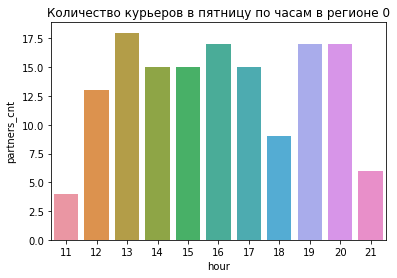

In [33]:
import seaborn as sns
sns.barplot(x='hour', y='partners_cnt', data = df6_fri[df6_fri.delivery_area_id == 0]).set(title='Количество курьеров в пятницу по часам в регионе 0');

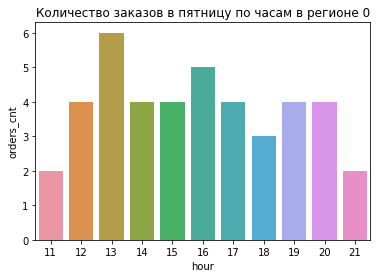

In [34]:
sns.barplot(x='hour', y='orders_cnt', data = df6_fri[df6_fri.delivery_area_id == 0]).set(title='Количество заказов в пятницу по часам в регионе 0');